```{admonition} Information
__Section__: Histogram of oriented gradients  
__Goal__: Understand a method to reduce the number of features for image processing.  
__Time needed__: 30 min  
__Prerequisites__: None
```

# Histogram of oriented gradients (HOG)

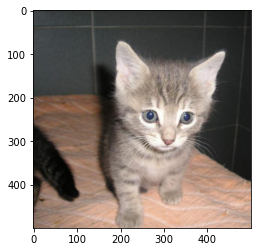

In [1]:
import matplotlib.pyplot as plt
from skimage import io

image = io.imread('./data/1.jpg')
plt.imshow(image)

## Understand HOG descriptors

In the previously shown image, we had a total of $500 \times 500 = 250.000$ pixels. Multiplied by 3 (for each color), this gives a total of 750.000 different values to code this image. Of course, this number is way too big to be used the same way we used the different AIS features in the previous chapter. We need a method to extract bigger informations from the picture, and have less attributes to perform a machine learning experiment.

They are many ways to express information from a high number of features, and in this course, we will see one that is often used in image processing: the histogram of oriented gradients.

The idea is to separate the picture into different blocks and code the information represented by the pixels in each block with less values, as lines of different sizes, intensities and directions. For example, we can divide the previous image in blocks of 16*16 pixels.  

## HOG with ``skimage``

The method we use to get the HOG descriptors for an images takes several parameters which we can change, including the number of different directions the lines should take and the size of the blocks. This will be easier to understand with a visualization:

```{toggle} Advanced level
To perform a HOG transformation and get the HOG descriptors for an image, we will use the method [HOG](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog) from the ``skimage.feature`` library.
```

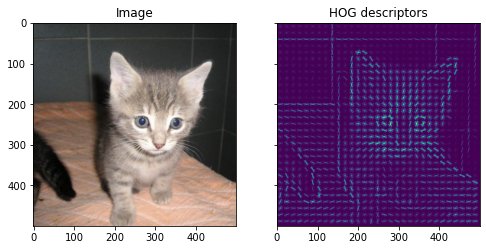

In [2]:
from skimage.exposure import rescale_intensity
from skimage.feature import hog


# Get the HOG descriptors
fd, hog_image = hog(image, orientations = 8, pixels_per_cell = (16, 16), visualize = True, multichannel = True)

# Rescale HOG image for better display
hog_image_rescaled = rescale_intensity(hog_image, in_range = (0, 10))

# Print the image and its HOG descriptors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4), sharex = True, sharey = True)

ax1.imshow(image)
ax1.set_title('Image')

ax2.imshow(hog_image_rescaled)
ax2.set_title('HOG descriptors')

plt.show()

Play around with the parameters ``orientations`` (number of orientations the lines can take) and ``pixels_per_cell`` (size of the blocks) to understand how they change the HOG descriptors and the quality of the information:

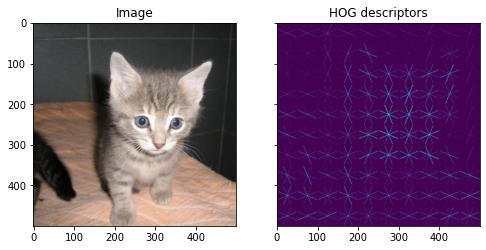

In [3]:
# Change the values of the parameters orientations and pixels_per_cell
fd, hog_image = hog(image, orientations = 4, pixels_per_cell = (50, 50), visualize = True, multichannel = True)



# Rescale HOG image for better display
hog_image_rescaled = rescale_intensity(hog_image, in_range = (0, 10))

# Print the image and its HOG descriptors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4), sharex = True, sharey = True)

ax1.imshow(image)
ax1.set_title('Image')

ax2.imshow(hog_image_rescaled)
ax2.set_title('HOG descriptors')

plt.show()

In [10]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_hog(orientations, pixels_per_cell_1, pixels_per_cell_2):
    fd, hog_image = hog(image, orientations = int(orientations),
                        pixels_per_cell = (int(pixels_per_cell_1), int(pixels_per_cell_2)),
                        visualize = True, multichannel = True)
    hog_image_rescaled = rescale_intensity(hog_image, in_range = (0, 10))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4), sharex = True, sharey = True)
    ax1.imshow(image)
    ax1.set_title('Image')
    ax2.imshow(hog_image_rescaled)
    ax2.set_title('HOG descriptors')
    plt.show()

    
interact(plot_hog,
         orientations = widgets.Text(value = '4',
                                 description = 'Orientations: ',
                                 disabled = False,),
         pixels_per_cell_1 = widgets.Text(value = '50',
                                 description = 'Size blocks: ',
                                 disabled = False,),
         pixels_per_cell_2 = widgets.Text(value = '50',
                                 description = '* ',
                                 disabled = False,))

interactive(children=(Text(value='4', description='Orientations: '), Text(value='50', description='Size blocks…

<function __main__.plot_hog(orientations, pixels_per_cell_1, pixels_per_cell_2)>

## Reduction of numbers of attributes

Finally, we can have a look at the number of features this HOG transformation leaves us with. We recall that the number of values necessary to code the raw image was:

In [5]:
len(image) * len(image[0]) * len(image[0][0])

750000

```{toggle} Advanced level
To use ``hog_image`` in an experiment without displaying it like we did before, we can set up the parameters ``visualize`` to ``False``. This gives the result of the HOG descriptors in a single array:
```

In [6]:
hog_image = hog(image, orientations = 8, pixels_per_cell = (16, 16), visualize = False, multichannel = True)
hog_image

array([0.10544113, 0.0140007 , 0.06475011, ..., 0.10502838, 0.03053196,
       0.03518951])

The length of the HOG array is now:

In [7]:
len(hog_image)

60552

Let's look at the length with different parameters (orientations = 8 and size of the blocks = 40*40):

In [8]:
hog_image = hog(image, orientations = 8, pixels_per_cell = (40, 40), visualize = False, multichannel = True)
len(hog_image)

7200

This leaves us with a number of values coding information of between 8% and 1% of the number of values necessary before, to code the raw picture.

After seeing all this, we can image that changing the parameters of the HOG descriptors will not only impact the number of attributes, but also the quality of the image representation. It is then necessary to adapt those attributes to the task we are working on (size of the object to detect in the image, differences in shapes between objects, etc...).

## Quiz

In [9]:
from IPython.display import IFrame
IFrame("https://blog.hoou.de/wp-admin/admin-ajax.php?action=h5p_embed&id=61", "760", "376")